<a href="https://colab.research.google.com/github/siya812/Coursera---Using-Python-to-Access-Web-Data/blob/master/JobRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

In [36]:

# Try different encodings until the file is read successfully
encodings = ['utf-8', 'ISO-8859-1', 'utf-16']

for encoding in encodings:
    try:
        df = pd.read_csv("job_descriptions.csv", encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read file with encoding:", encoding)

# Now you can use df as your DataFrame


Failed to read file with encoding: utf-8
File read successfully with encoding: ISO-8859-1


In [37]:
df.head()

,Job Title,Role,Job Description,skills,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

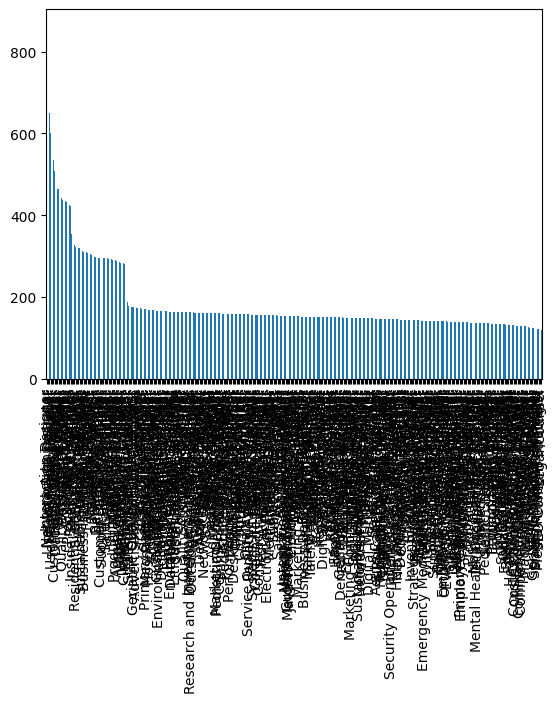

In [38]:
# @title Job Title Distribution by Role

df['Role'].value_counts().plot(kind='bar')

In [39]:
df.describe()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:

# Display the current columns
print("Current columns:")
print(df.columns)




Current columns:
Index(['Job Title', 'Role', 'Job Description', 'skills', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')


In [41]:
# List of columns to remove
columns_to_remove = ['Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 10']  # Replace with the actual column names you want to remove

# Drop the specified columns
df.drop(columns=columns_to_remove, inplace=True)

# Display the updated columns
print("\nColumns after removing specified columns:")
print(df.columns)

# Now you can use the updated DataFrame (df) for further analysis


Columns after removing specified columns:
Index(['Job Title', 'Role', 'Job Description', 'skills'], dtype='object')


In [42]:
df.head()

,Job Title,Role,Job Description,skills
0,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte..."
1,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g..."
2,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...
3,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...
4,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...


<Axes: xlabel='Job Title'>

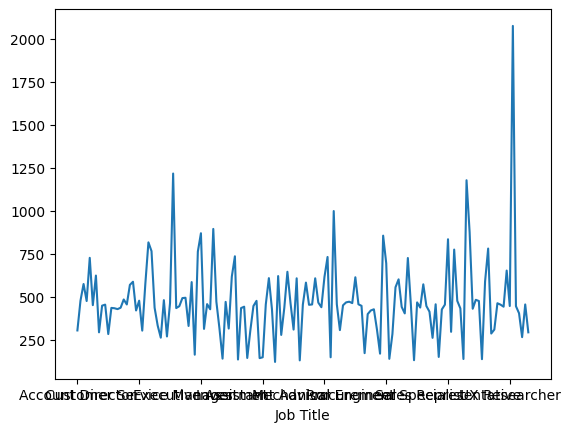

In [43]:
# @title Job Title Trends

df.groupby('Job Title')['Job Title'].count().plot.line()

In [44]:


# Display the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(df))






Number of rows before removing duplicates: 69461


In [45]:
# Drop rows with duplicate values in the "skills" column
df.drop_duplicates(subset=["skills"], keep="first", inplace=True)

# Display the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 377


In [46]:
df


,Job Title,Role,Job Description,skills
0,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte..."
1,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g..."
2,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...
3,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...
4,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...
...,...,...,...,...
1995,Sales Consultant,Sales Trainer,Sales Trainers develop and deliver training pr...,Sales training Sales coaching Training program...
2046,Finance Manager,Treasury Manager,Treasury Managers manage a companys treasury o...,Treasury management Cash flow analysis Risk ma...
2084,Tax Consultant,Business Tax Consultant,A Business Tax Consultant specializes in tax p...,Business tax law knowledge Corporate tax plann...
2507,HR Manager,Employee Development Manager,An Employee Development Manager focuses on emp...,Training and development Performance managemen...


In [47]:

from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['skills'])

# Convert TF-IDF matrix to DataFrame
skills_encoded_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the encoded skills DataFrame with the original DataFrame
df_encoded = pd.concat([df, skills_encoded_df], axis=1)

# Drop the original 'skills' column as it's no longer needed
df_encoded.drop(columns=['skills'], inplace=True)

# Now you can use df_encoded for building your predictive model


In [48]:
df


,Job Title,Role,Job Description,skills
0,Digital Marketing Specialist,Social Media Manager,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte..."
1,Web Developer,Frontend Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g..."
2,Operations Manager,Quality Control Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...
3,Network Engineer,Wireless Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...
4,Event Manager,Conference Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...
...,...,...,...,...
1995,Sales Consultant,Sales Trainer,Sales Trainers develop and deliver training pr...,Sales training Sales coaching Training program...
2046,Finance Manager,Treasury Manager,Treasury Managers manage a companys treasury o...,Treasury management Cash flow analysis Risk ma...
2084,Tax Consultant,Business Tax Consultant,A Business Tax Consultant specializes in tax p...,Business tax law knowledge Corporate tax plann...
2507,HR Manager,Employee Development Manager,An Employee Development Manager focuses on emp...,Training and development Performance managemen...


In [50]:
pip install pandas scikit-learn


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['skills'])

# Convert user input skills to TF-IDF vector
user_skills = input("Enter your skills separated by comma: ")
user_skills_tfidf = tfidf_vectorizer.transform([user_skills])

# Calculate cosine similarity between user skills and job descriptions
cosine_similarities = cosine_similarity(user_skills_tfidf, tfidf_matrix).flatten()

# Get indices of job titles sorted by similarity
similar_job_indices = cosine_similarities.argsort()[::-1]

# Print top 5 relevant job titles
print("Top 5 relevant job titles:")
for idx in similar_job_indices[:5]:
    print(df.iloc[idx]['Job Title'])


Enter your skills separated by comma: blockchain
Top 5 relevant job titles:
UI Developer
Substance Abuse Counselor
Business Analyst
Social Media Manager
Family Lawyer
